<a href="https://colab.research.google.com/github/fchollap/Virtual-acoustics-enviornment/blob/main/VAE__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib plotly

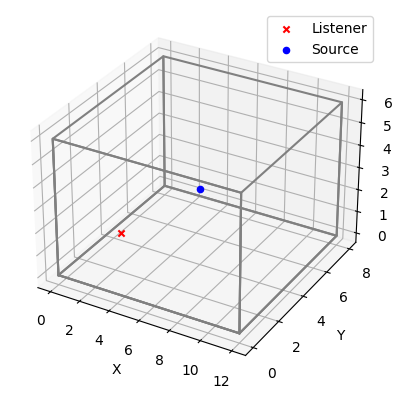

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Room dimensions
x = 12  # room length
y = 8   # room width
z = 6   # room height

# Listener position
listener_position = [2.0, 2.5, 1.0]

# Source (receiver) position
source_position = [6, 4, 3]

# Create a figure and axis for 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot room walls
ax.plot([0, x, x, 0, 0], [0, 0, y, y, 0], [0, 0, 0, 0, 0], color='gray')  # Floor
ax.plot([0, x, x, 0, 0], [0, 0, 0, 0, 0], [0, 0, z, z, 0], color='gray')  # Ceiling
ax.plot([0, 0, 0, 0, 0], [0, 0, y, y, 0], [0, z, z, 0, 0], color='gray')  # Left wall
ax.plot([x, x, x, x, x], [0, 0, y, y, 0], [0, z, z, 0, 0], color='gray')  # Right wall
ax.plot([0, x, x, 0, 0], [0, 0, 0, 0, 0], [0, 0, z, z, 0], color='gray')  # Front wall
ax.plot([0, x, x, 0, 0], [y, y, y, y, y], [0, 0, z, z, 0], color='gray')  # Back wall

# Plot the listener position
ax.scatter(listener_position[0], listener_position[1], listener_position[2], c='red', marker='x', label='Listener')

# Plot the source (receiver) position
ax.scatter(source_position[0], source_position[1], source_position[2], c='blue', marker='o', label='Source')

# Set plot labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()


# Show the plot
plt.show()


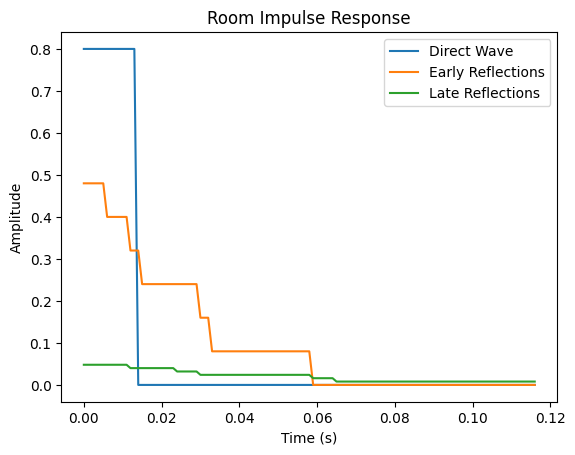

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Room dimensions
room_length = 12
room_width = 8
room_height = 6

# Listener position
listener_position = [2.0, 2.5, 1.0]

# Receiver position (source)
source_position = [6, 4, 3]

# Sound speed in meters per second
sound_speed = 343

# Calculate distances between listener, source, and room boundaries
listener_to_source = np.linalg.norm(np.array(source_position) - np.array(listener_position))
listener_to_walls = [
    listener_position[0],
    room_length - listener_position[0],
    listener_position[1],
    room_width - listener_position[1],
    listener_position[2],
    room_height - listener_position[2]
]

# Calculate time of arrival for direct wave, early reflections, and late reflections
time_direct_wave = listener_to_source / sound_speed
time_early_reflections = [2 * listener_to_walls[i] / sound_speed for i in range(6)]
time_late_reflections = [4 * listener_to_walls[i] / sound_speed for i in range(6)]

# Absorption coefficient for all walls
absorption_coefficient = 0.2

# Amplitude values for direct wave, early reflections, and late reflections
amplitude_direct_wave = 1.0 * (1 - absorption_coefficient)
amplitude_early_reflections = [0.1 * (1 - absorption_coefficient) for _ in range(6)]
amplitude_late_reflections = [0.01 * (1 - absorption_coefficient) for _ in range(6)]

# Time array
time = np.arange(0, max(time_direct_wave, max(time_early_reflections), max(time_late_reflections)), 0.001)

# Impulse response arrays
impulse_response_direct_wave = amplitude_direct_wave * np.where(time <= time_direct_wave, 1, 0)
impulse_response_early_reflections = np.zeros_like(time)
impulse_response_late_reflections = np.zeros_like(time)

# Calculate impulse response for early reflections
for i in range(6):
    impulse_response_early_reflections += amplitude_early_reflections[i] * np.where(time <= time_early_reflections[i], 1, 0)

# Calculate impulse response for late reflections
for i in range(6):
    impulse_response_late_reflections += amplitude_late_reflections[i] * np.where(time <= time_late_reflections[i], 1, 0)

# Plot the impulse response
plt.plot(time, impulse_response_direct_wave, label='Direct Wave')
plt.plot(time, impulse_response_early_reflections, label='Early Reflections')
plt.plot(time, impulse_response_late_reflections, label='Late Reflections')

# Set the axes labels and title
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Room Impulse Response')

# Show the legend
plt.legend()

# Show the plot
plt.show()


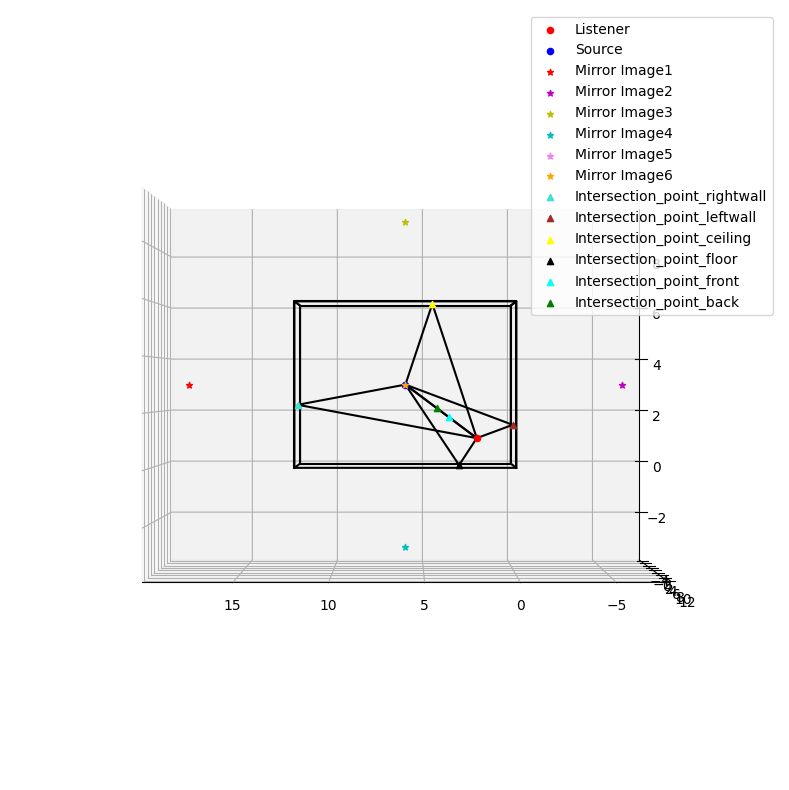

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and 3D axes
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the room dimensions
x = 12  # length
y = 8  # width
z = 6  # height

ax.plot([0, 0, x, x], [0, y, y, 0], [z, z, z, z], 'k-')  # ceiling
ax.plot([0, 0, 0, 0], [0, 0, y, y], [0, z, z, 0], 'k-')  # left wall
ax.plot([x, x, x, x], [0, 0, y, y], [0, z, z, 0], 'k-')  # right wall
ax.plot([0, 0, x, x], [0, y, y, 0], [0, 0, 0, 0], 'k-')  # floor
ax.plot([0, 0, x, x, 0], [0, 0, 0, 0, 0], [0, z, z, 0, 0], 'k-')  # front wall vectors
ax.plot([0, 0, x, x], [y, y, y, y], [0, z, z, 0], 'k-')  # back wall

# Define the positions of the listener and source
lis_pos = [2.0, 2.5, 1.0]
sou_pos = [6, 4, 3]

# Define the positions of the mirror image sources
mirror_pos1 = [12, 4, 3]
mirror_pos2 = [0, 4.0, 3.0]
mirror_pos3 = [6, 4, 6]
mirror_pos4 = [6, 4, 0]
mirror_pos5 = [6, 0, 3]
mirror_pos6 = [6, 8, 3]

# Calculate the mirror image sources
mirror_image1 = [2 * mirror_pos1[i] - sou_pos[i] for i in range(3)]
mirror_image2 = [2 * mirror_pos2[i] - sou_pos[i] for i in range(3)]
mirror_image3 = [2 * mirror_pos3[i] - sou_pos[i] for i in range(3)]
mirror_image4 = [2 * mirror_pos4[i] - sou_pos[i] for i in range(3)]
mirror_image5 = [2 * mirror_pos5[i] - sou_pos[i] for i in range(3)]
mirror_image6 = [2 * mirror_pos6[i] - sou_pos[i] for i in range(3)]

# Find the parameter 't' at which the line intersects the right wall
t1 = (12 - mirror_image1[0]) / (lis_pos[0] - mirror_image1[0])

# Calculate the coordinates of the intersection point on the right wall
intersection_point_r = [12, mirror_image1[1] + t1 * (lis_pos[1] - mirror_image1[1]),
                        mirror_image1[2] + t1 * (lis_pos[2] - mirror_image1[2])]

# Find the parameter 't' at which the line intersects the left wall
t2 = (0 - mirror_image2[0]) / (lis_pos[0] - mirror_image2[0])

# Calculate the coordinates of the intersection point on the left wall
intersection_point_l = [0, mirror_image2[1] + t2 * (lis_pos[1] - mirror_image2[1]),
                        mirror_image2[2] + t2 * (lis_pos[2] - mirror_image2[2])]

# Find the parameter 't' at which the line intersects the ceiling
t3 = (6 - mirror_image3[2]) / (lis_pos[2] - mirror_image3[2])

# Calculate the coordinates of the intersection point on the ceiling
intersection_point_c = [mirror_image3[0] + t3 * (lis_pos[0] - mirror_image3[0]),
                        mirror_image3[1] + t3 * (lis_pos[1] - mirror_image3[1]), 6]

# Find the parameter 't' at which the line intersects the floor
t4 = (0 - mirror_image4[2]) / (lis_pos[2] - mirror_image4[2])

# Calculate the coordinates of the intersection point on the floor
intersection_point_fl = [mirror_image4[0] + t4 * (lis_pos[0] - mirror_image4[0]),
                         mirror_image4[1] + t4 * (lis_pos[1] - mirror_image4[1]), 0]

# Find the parameter 't' at which the line intersects the front wall
t5 = (0 - mirror_image5[1]) / (lis_pos[1] - mirror_image5[1])

# Calculate the coordinates of the intersection point on the front wall
intersection_point_f = [mirror_image5[0] + t5 * (lis_pos[0] - mirror_image5[0]), 0,
                        mirror_image5[2] + t5 * (lis_pos[2] - mirror_image5[2])]

# Find the parameter 't' at which the line intersects the back wall
t6 = (8 - mirror_image6[1]) / (lis_pos[1] - mirror_image6[1])

# Calculate the coordinates of the intersection point on the back wall
intersection_point_b = [mirror_image6[0] + t6 * (lis_pos[0] - mirror_image6[0]), 8,
                        mirror_image6[2] + t6 * (lis_pos[2] - mirror_image6[2])]

# Plot the listener, source, and mirror image sources and their intersections on the wall
ax.scatter(lis_pos[0], lis_pos[1], lis_pos[2], color='red', label='Listener')
ax.scatter(sou_pos[0], sou_pos[1], sou_pos[2], color='blue', label='Source')
ax.scatter(mirror_image1[0], mirror_image1[1], mirror_image1[2], c='r', marker='*', label='Mirror Image1')
ax.scatter(mirror_image2[0], mirror_image2[1], mirror_image2[2], c='m', marker='*', label='Mirror Image2')
ax.scatter(mirror_image3[0], mirror_image3[1], mirror_image3[2], c='y', marker='*', label='Mirror Image3')
ax.scatter(mirror_image4[0], mirror_image4[1], mirror_image4[2], c='c', marker='*', label='Mirror Image4')
ax.scatter(mirror_image5[0], mirror_image5[1], mirror_image5[2], c='violet', marker='*', label='Mirror Image5')
ax.scatter(mirror_image6[0], mirror_image6[1], mirror_image6[2], c='orange', marker='*', label='Mirror Image6')
ax.scatter(intersection_point_r[0], intersection_point_r[1], intersection_point_r[2], c='turquoise', marker='^',
           label='Intersection_point_rightwall')
ax.scatter(intersection_point_l[0], intersection_point_l[1], intersection_point_l[2], c='brown', marker='^',
           label='Intersection_point_leftwall')
ax.scatter(intersection_point_c[0], intersection_point_c[1], intersection_point_c[2], c='yellow', marker='^',
           label='Intersection_point_ceiling')
ax.scatter(intersection_point_fl[0], intersection_point_fl[1], intersection_point_fl[2], c='black', marker='^',
           label='Intersection_point_floor')
ax.scatter(intersection_point_f[0], intersection_point_f[1], intersection_point_f[2], c='cyan', marker='^',
           label='Intersection_point_front')
ax.scatter(intersection_point_b[0], intersection_point_b[1], intersection_point_b[2], c='green', marker='^',
           label='Intersection_point_back')

# Plot the paths of the first-order reflections
ax.plot([sou_pos[0], intersection_point_r[0], lis_pos[0]],
        [sou_pos[1], intersection_point_r[1], lis_pos[1]],
        [sou_pos[2], intersection_point_r[2], lis_pos[2]], 'k-')
ax.plot([sou_pos[0], intersection_point_l[0], lis_pos[0]],
        [sou_pos[1], intersection_point_l[1], lis_pos[1]],
        [sou_pos[2], intersection_point_l[2], lis_pos[2]], 'k-')
ax.plot([sou_pos[0], intersection_point_c[0], lis_pos[0]],
        [sou_pos[1], intersection_point_c[1], lis_pos[1]],
        [sou_pos[2], intersection_point_c[2], lis_pos[2]], 'k-')
ax.plot([sou_pos[0], intersection_point_fl[0], lis_pos[0]],
        [sou_pos[1], intersection_point_fl[1], lis_pos[1]],
        [sou_pos[2], intersection_point_fl[2], lis_pos[2]], 'k-')
ax.plot([sou_pos[0], intersection_point_f[0], lis_pos[0]],
        [sou_pos[1], intersection_point_f[1], lis_pos[1]],
        [sou_pos[2], intersection_point_f[2], lis_pos[2]], 'k-')
ax.plot([sou_pos[0], intersection_point_b[0], lis_pos[0]],
        [sou_pos[1], intersection_point_b[1], lis_pos[1]],
        [sou_pos[2], intersection_point_b[2], lis_pos[2]], 'k-')

# Set the view to top view
ax.view_init(elev=0, azim=90)

ax.legend()
plt.show()

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go


# Function to calculate mirror image sources based on room dimensions, source position, reflection order, sound directivities and absorption coefficients
def calculate_mirror_sources(room_dimensions, source_position, reflection_order, sound_directivities, absorption_coefficients):
    """
    Calculate mirror image sources based on room dimensions, source position, reflection order, sound directivities, and absorption coefficients.

    Args:
        room_dimensions (list): Dimensions of the rectangular room [x_dim, y_dim, z_dim].
        source_position (list): Position of the sound source [source_x, source_y, source_z].
        reflection_order (int): Order of reflections.
        sound_directivities (dict): Sound directivities.
        absorption_coefficients (dict): Absorption coefficients.

    Returns:
        list: Mirror image sources as a list of tuples (x, y, z).
    """
    x_dim, y_dim, z_dim = room_dimensions
    source_x, source_y, source_z = source_position

    # Initialize the set with the original source position
    image_sources = set()

    # Iterate for each reflection order
    for order in range(1, reflection_order + 1):
        # Initialize the set for new mirror sources
        new_sources = set()

        # Calculate mirror sources for the first order
        if order == 1:
            new_sources = {(2*x_dim - source_x, source_y, source_z),
                           (-source_x, source_y, source_z),
                           (source_x, 2*y_dim - source_y, source_z),
                           (source_x, -source_y, source_z),
                           (source_x, source_y, 2*z_dim - source_z),
                           (source_x, source_y, -source_z)}
        else:
            # Calculate mirror sources for higher orders
            for x, y, z in image_sources:
                for direction, sound_power in sound_directivities.items():
                    new_sources.update({(2 * x_dim - x, y, z): sound_power * absorption_coefficients[direction],
                                        (-x, y, z): sound_power * absorption_coefficients[direction],
                                        (x, 2 * y_dim - y, z): sound_power * absorption_coefficients[direction],
                                        (x, -y, z): sound_power * absorption_coefficients[direction],
                                        (x, y, 2 * z_dim - z): sound_power * absorption_coefficients[direction],
                                        (x, y, -z): sound_power * absorption_coefficients[direction]})
        # Update the set of mirror sources with the new sources
        image_sources.update(new_sources)

    # Remove the primary source position from the mirror sources
    image_sources.discard((source_x, source_y, source_z))

    return list(image_sources)

def get_reflection_order():
    """
    Prompt the user to enter the order of reflections and ensure that the input is a valid positive integer.

    Returns:
        int: The order of reflections.
    """
    while True:
        try:
            reflection_order = int(input("Enter the order of reflections: "))
            if reflection_order < 0:
                print("Reflection order must be a positive number. Please try again.")
                continue
            return reflection_order
        except ValueError:
            print("Invalid input. Please enter a number.")

def plot_simulation(mirror_sources, listener_position, source_position, room_dimensions):
    """
    Visualize the room, the listener, the source, and the mirror image sources using Plotly.

    Args:
        mirror_sources (list): Mirror image sources as a list of tuples (x, y, z).
        listener_position (list): Position of the listener [listener_x, listener_y, listener_z].
        source_position (list): Position of the sound source [source_x, source_y, source_z].
        room_dimensions (list): Dimensions of the rectangular room [x_dim, y_dim, z_dim].
    """
    x, y, z = room_dimensions

    fig = go.Figure()

    # Plot the bottom, top, and walls of the room
    fig.add_trace(go.Scatter3d(x=[0, x, x, 0, 0], y=[0, 0, y, y, 0], z=[0, 0, 0, 0, 0],
                               mode='lines', name='Room Bottom', line=dict(color='black')))
    fig.add_trace(go.Scatter3d(x=[0, x, x, 0, 0], y=[0, 0, y, y, 0], z=[z, z, z, z, z],
                               mode='lines', name='Room Top', line=dict(color='black')))
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, 0], z=[0, z],
                               mode='lines', name='Room Wall 1', line=dict(color='black')))
    fig.add_trace(go.Scatter3d(x=[x, x], y=[0, 0], z=[0, z],
                               mode='lines', name='Room Wall 2', line=dict(color='black')))
    fig.add_trace(go.Scatter3d(x=[x, x], y=[y, y], z=[0, z],
                               mode='lines', name='Room Wall 3', line=dict(color='black')))
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[y, y], z=[0, z],
                               mode='lines', name='Room Wall 4', line=dict(color='black')))

    # Plot the listener and source positions
    fig.add_trace(go.Scatter3d(x=[listener_position[0]], y=[listener_position[1]], z=[listener_position[2]],
                               mode='markers', name='Listener', marker=dict(size=5, color='green')))
    fig.add_trace(go.Scatter3d(x=[source_position[0]], y=[source_position[1]], z=[source_position[2]],
                               mode='markers', name='Source', marker=dict(size=5, color='blue')))

    # Plot the mirror image sources
    mirror_x = [source[0] for source in mirror_sources]
    mirror_y = [source[1] for source in mirror_sources]
    mirror_z = [source[2] for source in mirror_sources]
    fig.add_trace(go.Scatter3d(x=mirror_x, y=mirror_y, z=mirror_z,
                               mode='markers', name='Mirror Sources', marker=dict(size=5, color='red')))

    # Set the axes labels and layout
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'),
        width=700,
        margin=dict(r=20, l=10, b=10, t=10))

    # Show the plot
    fig.show()

# Define the sound directivities and absorption coefficients
sound_directivities = {'omnidirectional': 1}
absorption_coefficients = {'omnidirectional': 0.2}

# Define the listener and source positions
listener_position = [2.0, 2.5, 1.0]
source_position = [6, 4, 3]

# Define the room dimensions
x = 12
y = 8
z = 6

# Get the order of reflections from the user
reflection_order = get_reflection_order()

# Calculate the mirror sources
mirror_sources = calculate_mirror_sources([x, y, z], source_position, reflection_order, sound_directivities, absorption_coefficients)

# Plot the simulation
plot_simulation(mirror_sources, listener_position, source_position, [x, y, z])


Enter the order of reflections: 1


In [ ]:
def print_mirror_sources_coordinates(mirror_sources):
    """
    Print the coordinates of mirror image sources.

    Args:
        mirror_sources (list): List of mirror image sources as tuples (x, y, z).
    """
    for idx, mirror_source in enumerate(mirror_sources):
        print(f"Mirror image source {idx}: {mirror_source}")

# Call the function to print the mirror sources coordinates
print_mirror_sources_coordinates(mirror_sources)


Mirror image source 0: (6, 4, -3)
Mirror image source 1: (-6, 4, 3)
Mirror image source 2: (6, 4, 9)
Mirror image source 3: (18, 4, 3)
Mirror image source 4: (6, 12, 3)
Mirror image source 5: (6, -4, 3)


In [ ]:
import numpy as np
import plotly.graph_objs as go

def line_plane_intersection(plane_point, plane_normal, line_point, line_direction):
    """
    Function to find the intersection point of a line and a plane.

    Args:
        plane_point (np.array): A point on the plane.
        plane_normal (np.array): The normal vector of the plane.
        line_point (np.array): A point on the line.
        line_direction (np.array): The direction vector of the line.

    Returns:
        np.array: The intersection point.
    """
    t = np.dot((plane_point - line_point), plane_normal) / np.dot(line_direction, plane_normal)
    return line_point + t * line_direction

# Define the planes of the room
planes = [
    ([x, 0, 0], [-1, 0, 0]),  # Right wall
    ([0, y, 0], [0, -1, 0]),  # Front wall
    ([0, 0, z], [0, 0, -1]),  # Ceiling
    ([0, 0, 0], [1, 0, 0]),   # Left wall
    ([0, 0, 0], [0, 1, 0]),   # Back wall
    ([0, 0, 0], [0, 0, 1])    # Floor
]

# Initialize the figure
fig = go.Figure()

# Add traces for the room
fig.add_trace(go.Scatter3d(x=[0, x, x, 0, 0], y=[0, 0, y, y, 0], z=[0, 0, 0, 0, 0],
                           mode='lines', name='Room Bottom', line=dict(color='black')))
fig.add_trace(go.Scatter3d(x=[0, x, x, 0, 0], y=[0, 0, y, y, 0], z=[z, z, z, z, z],
                           mode='lines', name='Room Top', line=dict(color='black')))
fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, 0], z=[0, z],
                           mode='lines', name='Room Wall 1', line=dict(color='black')))
fig.add_trace(go.Scatter3d(x=[x, x], y=[0, 0], z=[0, z],
                           mode='lines', name='Room Wall 2', line=dict(color='black')))
fig.add_trace(go.Scatter3d(x=[x, x], y=[y, y], z=[0, z],
                           mode='lines', name='Room Wall 3', line=dict(color='black')))
fig.add_trace(go.Scatter3d(x=[0, 0], y=[y, y], z=[0, z],
                           mode='lines', name='Room Wall 4', line=dict(color='black')))

# Add traces for the listener and source
fig.add_trace(go.Scatter3d(x=[listener_position[0]], y=[listener_position[1]], z=[listener_position[2]],
                           mode='markers', name='Listener', marker=dict(size=4, color='green')))
fig.add_trace(go.Scatter3d(x=[source_position[0]], y=[source_position[1]], z=[source_position[2]],
                           mode='markers', name='Source', marker=dict(size=4, color='blue')))

# Add traces for the mirror sources and their intersections with the room
for mirror_source in mirror_sources:
    fig.add_trace(go.Scatter3d(x=[mirror_source[0]], y=[mirror_source[1]], z=[mirror_source[2]],
                               mode='markers', name='Mirror Sources', marker=dict(size=4, color='red')))

    line_direction = np.array(listener_position) - np.array(mirror_source)

    for plane_point, plane_normal in planes:
        # Calculate the intersection of the line with the plane
        intersection = line_plane_intersection(np.array(plane_point), np.array(plane_normal), np.array(mirror_source), line_direction)
        # Calculate the distance from the source to the listener
        distance_source_listener = np.linalg.norm(np.array(listener_position) - np.array(mirror_source))
        # Calculate the distance from the source to the intersection
        distance_source_intersection = np.linalg.norm(intersection - np.array(mirror_source))
        if distance_source_intersection <= distance_source_listener:
            if 0 <= intersection[0] <= x and 0 <= intersection[1] <= y and 0 <= intersection[2] <= z:
                fig.add_trace(go.Scatter3d(x=[intersection[0]], y=[intersection[1]], z=[intersection[2]],
                                           mode='markers', name='Intersection', marker=dict(size=2, color='yellow')))
                fig.add_trace(go.Scatter3d(x=[source_position[0], intersection[0]], y=[source_position[1], intersection[1]], z=[source_position[2], intersection[2]],
                                           mode='lines', name='Source-Intersection', line=dict(color='grey', dash='dash')))
                fig.add_trace(go.Scatter3d(x=[intersection[0], listener_position[0]], y=[intersection[1], listener_position[1]], z=[intersection[2], listener_position[2]],
                                           mode='lines', name='Intersection-Listener', line=dict(color='grey', dash='dash')))
                break

# Add trace for the path from the source to the listener
fig.add_trace(go.Scatter3d(x=[source_position[0], listener_position[0]], y=[source_position[1], listener_position[1]], z=[source_position[2], listener_position[2]],
                           mode='lines', name='Source-Listener', line=dict(color='orange')))

# Update layout and show the figure
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()


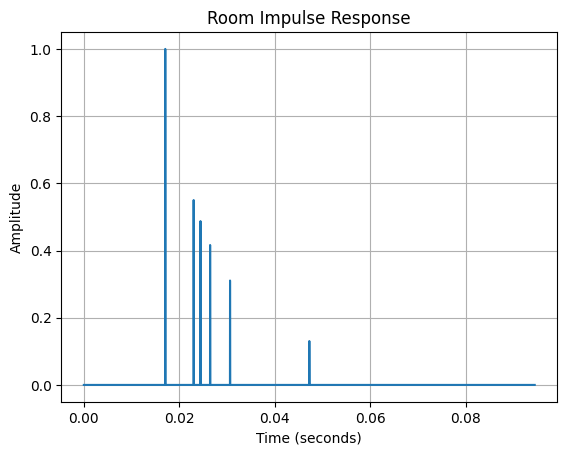

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Define the room impulse response calculation function
def calculate_room_impulse_response(listener_position, source_position, mirror_sources, room_dimensions,
                                    sound_directivities, absorption_coefficients, sample_rate=44100):
    """
    Calculate the room impulse response given the listener position, source position, mirror sources, room dimensions,
    sound directivities, absorption coefficients, and sample rate.

    Args:
        listener_position (list): Position of the listener [listener_x, listener_y, listener_z].
        source_position (list): Position of the sound source [source_x, source_y, source_z].
        mirror_sources (list): Mirror image sources as a list of tuples (x, y, z).
        room_dimensions (list): Dimensions of the rectangular room [x_dim, y_dim, z_dim].
        sound_directivities (dict): Sound directivities.
        absorption_coefficients (dict): Absorption coefficients.
        sample_rate (int, optional): Sample rate in Hz. Defaults to 44100.

    Returns:
        np.array: The room impulse response.
    """
    x_dim, y_dim, z_dim = room_dimensions
    sound_speed = 343  # Speed of sound in m/s

    # Calculate the time of flight for each mirror source
    distances = np.linalg.norm(np.array(mirror_sources) - np.array(listener_position), axis=1)
    times_of_flight = distances / sound_speed

    # Calculate the room impulse response
    duration = int(np.max(times_of_flight) * 2 * sample_rate)  # Duration in samples
    impulse_response = np.zeros(duration)

    # Add contributions from direct reflections, early reflections, and late reflections
    for i, time_of_flight in enumerate(times_of_flight):
        delay_seconds = time_of_flight
        sound_power = 1 / (distances[i] ** 2)

        # Apply sound directivity and absorption coefficient
        direction = "omnidirectional"  # Default sound directivity
        if direction in sound_directivities:
            sound_power *= sound_directivities[direction]

        # Apply absorption coefficient
        absorption = absorption_coefficients.get(direction, 0.2)
        sound_power *= absorption

        delay_samples = int(delay_seconds * sample_rate)
        impulse_response[delay_samples] += sound_power

    # Normalize the impulse response
    impulse_response /= np.max(impulse_response)

    return impulse_response

# Calculate the room impulse response
room_impulse_response = calculate_room_impulse_response(listener_position, source_position, mirror_sources,
                                                        [x, y, z], sound_directivities, absorption_coefficients)

# Generate the time axis in seconds
sample_rate = 44100
time = np.arange(len(room_impulse_response)) / sample_rate

# Plot the room impulse response graph
plt.figure()
plt.plot(time, room_impulse_response)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Room Impulse Response')
plt.grid(True)



# Save the plot as an image file (e.g., PNG)
plt.savefig('room_impulse_response.png')

plt.show()
